In [88]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [89]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                              ])
trainset = datasets.MNIST('~.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size =64, shuffle =True)

In [90]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


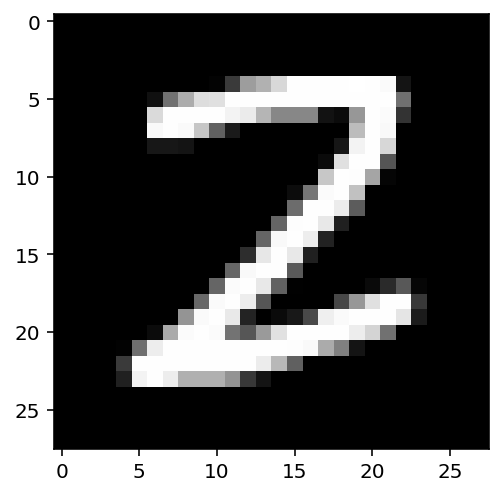

In [91]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [92]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0],-1)
print(inputs)
    

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])


In [93]:
w1 = torch.randn(784,256)
w2 = torch.randn(256, 10)
b1 = torch.randn(256)
b2 = torch.randn(10)
h = activation(torch.mm(inputs,w1)+b1)
outputs = torch.mm(h,w2)+b2
print(outputs)

tensor([[  0.1495, -18.8136,  -6.3817, -13.4349,   9.5080,   9.2192, -19.5253,
           6.4155,  14.3340,  14.9760],
        [  1.9083, -11.8656,  -5.2534, -15.1154,  16.7928,   6.5730, -31.1923,
           6.0732,  12.8702,  14.6863],
        [  6.2220, -13.2894,   4.6352, -13.5787,  11.2606,   4.4231, -18.0010,
           4.4897,  23.5986,  11.3732],
        [  7.2787,  -9.3439,  -0.5488,  -5.0073,   7.0180,   1.2787, -16.4169,
           4.5051,  10.1391,   9.7328],
        [ -7.9066, -11.0421,   3.5689, -10.9883,  22.1635,  13.2231, -22.0110,
           7.9543,   2.4206,   1.6862],
        [  6.1103,   5.0582,   7.8556, -10.8052,  12.3126,   4.2428, -27.7812,
          10.3023,  10.5556,  10.1037],
        [ -0.6432,  -5.4143,  -1.8416, -13.3093,   2.1041,   2.2604, -17.2136,
          -7.9780,  13.1175,   3.7154],
        [  5.9284, -17.9252, -12.7835, -10.3323,   9.6504,   7.5986, -21.8153,
           3.9704,   6.4596,   8.3387],
        [  2.2015,  -0.3443,   0.1814,  -3.6182,

In [94]:
m = nn.Softmax(dim =1)
probabilities = m(output)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [95]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [96]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [97]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.hidden = nn.Linear(256, 10)
    def forword(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        return x

In [98]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim =1)
        return x
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [99]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0131,  0.0202,  0.0156,  ..., -0.0133,  0.0241,  0.0281],
        [ 0.0065, -0.0033, -0.0123,  ..., -0.0254, -0.0317, -0.0103],
        [ 0.0193, -0.0229, -0.0295,  ..., -0.0103, -0.0181,  0.0322],
        ...,
        [-0.0041, -0.0141, -0.0138,  ...,  0.0156, -0.0284, -0.0241],
        [ 0.0062, -0.0325, -0.0314,  ...,  0.0150, -0.0288,  0.0008],
        [ 0.0091, -0.0079,  0.0234,  ..., -0.0014,  0.0004, -0.0214]],
       requires_grad=True)
Parameter containing:
tensor([-0.0271, -0.0122, -0.0058,  0.0231, -0.0178,  0.0146,  0.0215,  0.0333,
        -0.0204, -0.0220,  0.0166, -0.0133, -0.0245, -0.0054, -0.0307, -0.0249,
         0.0055, -0.0311,  0.0090, -0.0041,  0.0108, -0.0293, -0.0225, -0.0145,
         0.0168,  0.0039, -0.0339, -0.0085, -0.0055,  0.0235,  0.0093, -0.0314,
        -0.0086,  0.0124,  0.0047,  0.0233, -0.0072,  0.0141, -0.0212,  0.0117,
        -0.0357,  0.0267,  0.0190, -0.0165, -0.0029,  0.0201, -0.0181,  0.0280,
        -0.0208

In [100]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [101]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0110,  0.0018,  0.0085,  ..., -0.0005,  0.0031, -0.0037],
        [-0.0006, -0.0214, -0.0030,  ..., -0.0136,  0.0032, -0.0075],
        [ 0.0006, -0.0003,  0.0030,  ..., -0.0064, -0.0089, -0.0065],
        ...,
        [-0.0065, -0.0168, -0.0016,  ...,  0.0108, -0.0027, -0.0046],
        [-0.0166, -0.0087, -0.0071,  ...,  0.0157, -0.0115,  0.0059],
        [ 0.0099, -0.0034, -0.0013,  ...,  0.0034,  0.0025,  0.0259]])

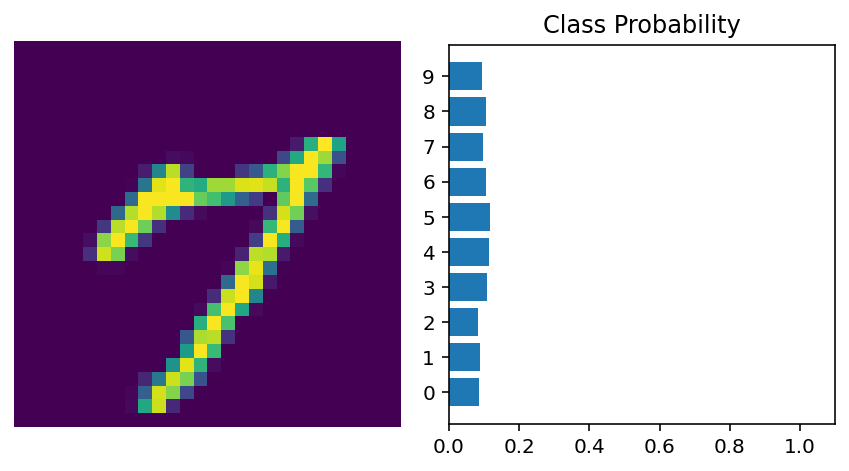

In [102]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
images.resize_(64,1,784)
img_idx=0
ps = model.forward(images[img_idx,:])
img = images[img_idx]
helper.view_classify(img.view(1,28,28),ps)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


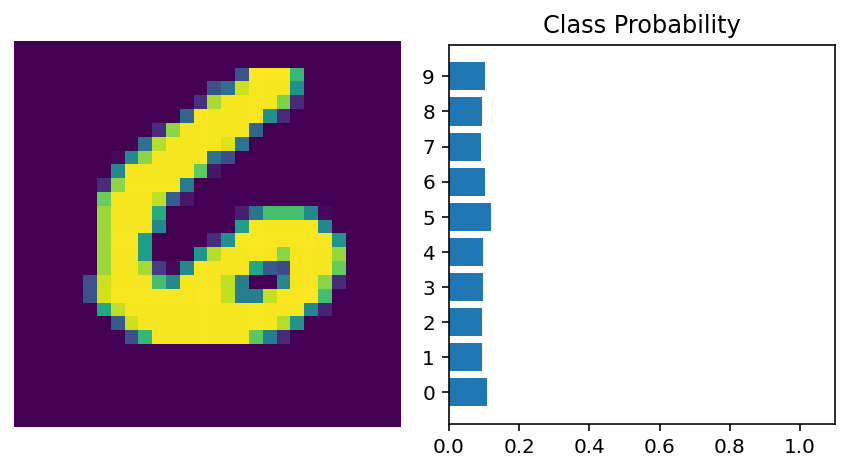

In [103]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10
model = nn.Sequential(nn.Linear(784, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],10),
                      nn.Softmax(dim=1))
print(model)
images,labels = next(iter(trainloader))
images.resize_(images.shape[0],1,784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28),ps)
                      


In [104]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0207,  0.0240,  0.0080,  ..., -0.0175, -0.0103,  0.0140],
        [ 0.0041, -0.0216, -0.0251,  ..., -0.0169,  0.0023, -0.0052],
        [ 0.0196,  0.0127,  0.0117,  ...,  0.0182, -0.0176, -0.0320],
        ...,
        [ 0.0172, -0.0315, -0.0203,  ...,  0.0316, -0.0322, -0.0279],
        [-0.0252,  0.0235, -0.0203,  ...,  0.0218, -0.0162, -0.0314],
        [-0.0112,  0.0038,  0.0110,  ...,  0.0092, -0.0117,  0.0323]],
       requires_grad=True)

In [105]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [106]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
